# Case studies Sales

In [2]:
# Import sales.csv: sales
sales <- read.csv("sales.csv", stringsAsFactors = FALSE)

# import library
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)

# setting the graphic width and height for ggplot
library(repr)
options(repr.plot.width=6, repr.plot.height=4)


Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last



Examining the data

In [33]:
dim(sales)

[1] 5000   46

In [34]:
head(sales)

X,event_id,primary_act_id,secondary_act_id,purch_party_lkup_id,event_name,primary_act_name,secondary_act_name,major_cat_name,minor_cat_name,...,edu_1st_indv_val,edu_2nd_indv_val,adults_in_hh_num,married_ind,child_present_ind,home_owner_ind,occpn_val,occpn_1st_val,occpn_2nd_val,dist_to_ven
1,abcaf1adb99a935fc661,43f0436b905bfa7c2eec,b85143bf51323b72e53c,7dfa56dd7d5956b17587,Xfinity Center Mansfield Premier Parking: Florida Georgia Line,XFINITY Center Mansfield Premier Parking,NULL,MISC,PARKING,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,6c56d7f08c95f2aa453c,1a3e9aecd0617706a794,f53529c5679ea6ca5a48,4f9e6fc637eaf7b736c2,Gorge Camping - dave matthews band - sept 3-7,Gorge Camping,Dave Matthews Band,MISC,CAMPING,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,59
3,c7ab4524a121f9d687d2,4b677c3f5bec71eec8d1,b85143bf51323b72e53c,6c2545703bd527a7144d,Dodge Theatre Adams Street Parking - benise,Parking Event,NULL,MISC,PARKING,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,394cb493f893be9b9ed1,b1ccea01ad6ef8522796,b85143bf51323b72e53c,527d6b1eaffc69ddd882,Gexa Energy Pavilion Vip Parking : kid rock with sheryl crow,Gexa Energy Pavilion VIP Parking,NULL,MISC,PARKING,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,55b5f67e618557929f48,91c03a34b562436efa3c,b85143bf51323b72e53c,8bd62c394a35213bdf52,Premier Parking - motley crue,White River Amphitheatre Premier Parking,NULL,MISC,PARKING,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,4f10fd8b9f550352bd56,ac4b847b3fde66f2117e,63814f3d63317f1b56c4,3b3a628f83135acd0676,Fast Lane Access: Journey,Fast Lane Access,Journey,MISC,SPECIAL ENTRY (UPSELL),...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [35]:
names(sales)

[1] "X"                      "event_id"               "primary_act_id"        
 [4] "secondary_act_id"       "purch_party_lkup_id"    "event_name"            
 [7] "primary_act_name"       "secondary_act_name"     "major_cat_name"        
[10] "minor_cat_name"         "la_event_type_cat"      "event_disp_name"       
[13] "ticket_text"            "tickets_purchased_qty"  "trans_face_val_amt"    
[16] "delivery_type_cd"       "event_date_time"        "event_dt"              
[19] "presale_dt"             "onsale_dt"              "sales_ord_create_dttm" 
[22] "sales_ord_tran_dt"      "print_dt"               "timezn_nm"             
[25] "venue_city"             "venue_state"            "venue_postal_cd_sgmt_1"
[28] "sales_platform_cd"      "print_flg"              "la_valid_tkt_event_flg"
[31] "fin_mkt_nm"             "web_session_cookie_val" "gndr_cd"               
[34] "age_yr"                 "income_amt"             "edu_val"               
[37] "edu_1st_indv_val"       "edu_2nd_indv_val"       "adults_in_hh_num"      
[40] "married_ind"            "child_present_ind"      "home_owner_ind"        
[43] "occpn_val"              "occpn_1st_val"          "occpn_2nd_val"         
[46] "dist_to_ven"

Summarise the data

In [36]:
str(sales)

'data.frame':	5000 obs. of  46 variables:
 $ X                     : int  1 2 3 4 5 6 7 8 9 10 ...
 $ event_id              : chr  "abcaf1adb99a935fc661" "6c56d7f08c95f2aa453c" "c7ab4524a121f9d687d2" "394cb493f893be9b9ed1" ...
 $ primary_act_id        : chr  "43f0436b905bfa7c2eec" "1a3e9aecd0617706a794" "4b677c3f5bec71eec8d1" "b1ccea01ad6ef8522796" ...
 $ secondary_act_id      : chr  "b85143bf51323b72e53c" "f53529c5679ea6ca5a48" "b85143bf51323b72e53c" "b85143bf51323b72e53c" ...
 $ purch_party_lkup_id   : chr  "7dfa56dd7d5956b17587" "4f9e6fc637eaf7b736c2" "6c2545703bd527a7144d" "527d6b1eaffc69ddd882" ...
 $ event_name            : chr  "Xfinity Center Mansfield Premier Parking: Florida Georgia Line" "Gorge Camping - dave matthews band - sept 3-7" "Dodge Theatre Adams Street Parking - benise" "Gexa Energy Pavilion Vip Parking : kid rock with sheryl crow" ...
 $ primary_act_name      : chr  "XFINITY Center Mansfield Premier Parking" "Gorge Camping" "Parking Event" "Gexa Energy Pavilion VI

In [37]:
glimpse(sales)

Observations: 5,000
Variables: 46
$ X                      <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1...
$ event_id               <chr> "abcaf1adb99a935fc661", "6c56d7f08c95f2aa453...
$ primary_act_id         <chr> "43f0436b905bfa7c2eec", "1a3e9aecd0617706a79...
$ secondary_act_id       <chr> "b85143bf51323b72e53c", "f53529c5679ea6ca5a4...
$ purch_party_lkup_id    <chr> "7dfa56dd7d5956b17587", "4f9e6fc637eaf7b736c...
$ event_name             <chr> "Xfinity Center Mansfield Premier Parking: F...
$ primary_act_name       <chr> "XFINITY Center Mansfield Premier Parking", ...
$ secondary_act_name     <chr> "NULL", "Dave Matthews Band", "NULL", "NULL"...
$ major_cat_name         <chr> "MISC", "MISC", "MISC", "MISC", "MISC", "MIS...
$ minor_cat_name         <chr> "PARKING", "CAMPING", "PARKING", "PARKING", ...
$ la_event_type_cat      <chr> "PARKING", "INVALID", "PARKING", "PARKING", ...
$ event_disp_name        <chr> "Xfinity Center Mansfield Premier Parking: F...
$ ticket_text     

In [38]:
summary(sales)

       X          event_id         primary_act_id     secondary_act_id  
 Min.   :   1   Length:5000        Length:5000        Length:5000       
 1st Qu.:1251   Class :character   Class :character   Class :character  
 Median :2500   Mode  :character   Mode  :character   Mode  :character  
 Mean   :2500                                                           
 3rd Qu.:3750                                                           
 Max.   :5000                                                           
                                                                        
 purch_party_lkup_id  event_name        primary_act_name   secondary_act_name
 Length:5000         Length:5000        Length:5000        Length:5000       
 Class :character    Class :character   Class :character   Class :character  
 Mode  :character    Mode  :character   Mode  :character   Mode  :character  
                                                                             
                          

Removing reduntant info 
<br>The first column X is not needed. 

In [39]:
sales2 <- sales[, -1]

The first 4 columns internal id which gives us no information and the last 15 variables have mostly NA and therefore not useful

In [40]:
# Define a vector of column indices: keep
keep <- c(5:30)

# Subset sales2 using keep: sales3
sales3 <- sales2[, keep]

Separating columns

In [41]:
# Split event_date_time: sales4
sales4 <- separate(sales3, event_date_time,
                   c("event_dt", "event_time"), sep = " ")

# Split sales_ord_create_dttm: sales5
sales5 <- separate(sales4, sales_ord_create_dttm,
                  c("ord_create_dt", "ord_create_time"), sep = " ")

Warning message:
"Expected 2 pieces. Missing pieces filled with `NA` in 4 rows [2516, 3863, 4082, 4183]."

Dealing with warnings

In [42]:
# Define an issues vector
issues <- c(2516, 3863, 4082, 4183)

# Print values of sales_ord_create_dttm at these indices
sales3$sales_ord_create_dttm[issues]

# Print a well-behaved value of sales_ord_create_dttm
sales3$sales_ord_create_dttm[2517]

[1] "NULL" "NULL" "NULL" "NULL"

[1] "2013-08-04 23:07:19"

Identifying dates

In [43]:
# Load stringr
library(stringr)

# Find columns of sales5 containing "dt": date_cols
date_cols <- str_detect(names(sales5), "dt")

head(sales5[, date_cols])
# Load lubridate
library(lubridate)

# Coerce date columns into Date objects
sales5[, date_cols] <- lapply(sales5[, date_cols], ymd )

event_dt,presale_dt,onsale_dt,ord_create_dt,sales_ord_tran_dt,print_dt
2015-09-12,NULL,2015-05-15,2015-09-11,2015-09-11,2015-09-12
2009-09-05,NULL,2009-03-13,2009-07-06,2009-07-05,2009-09-01
2006-04-22,NULL,2006-02-25,2006-04-05,2006-04-05,2006-04-05
2011-09-03,NULL,2011-04-22,2011-07-01,2011-07-01,2011-07-06
2005-07-31,2005-03-02,2005-03-04,2005-06-18,2005-06-18,2005-06-28
2012-07-22,NULL,2012-04-11,2012-07-21,2012-07-21,2012-07-21


Warning message:
" 2892 failed to parse."Warning message:
" 101 failed to parse."Warning message:
" 4 failed to parse."Warning message:
" 424 failed to parse."

Dealing with warnings
<br> some more warnings, it is probably due to NA but better check

In [44]:
# Find date columns (
date_cols <- str_detect(names(sales5), "dt")

# Create logical vectors indicating missing values 
missing <- lapply(sales5[, date_cols], is.na)

# Create a numerical vector that counts missing values: num_missing
num_missing <- sapply(missing, sum)

# Print num_missing
num_missing

event_dt        presale_dt         onsale_dt     ord_create_dt 
                0              2892               101                 4 
sales_ord_tran_dt          print_dt 
                0               424

In [45]:
glimpse(sales5)

Observations: 5,000
Variables: 27
$ event_name             <chr> "Xfinity Center Mansfield Premier Parking: F...
$ primary_act_name       <chr> "XFINITY Center Mansfield Premier Parking", ...
$ secondary_act_name     <chr> "NULL", "Dave Matthews Band", "NULL", "NULL"...
$ major_cat_name         <chr> "MISC", "MISC", "MISC", "MISC", "MISC", "MIS...
$ minor_cat_name         <chr> "PARKING", "CAMPING", "PARKING", "PARKING", ...
$ la_event_type_cat      <chr> "PARKING", "INVALID", "PARKING", "PARKING", ...
$ event_disp_name        <chr> "Xfinity Center Mansfield Premier Parking: F...
$ ticket_text            <chr> "   THIS TICKET IS VALID        FOR PARKING ...
$ tickets_purchased_qty  <int> 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 4, 1, 1,...
$ trans_face_val_amt     <dbl> 45, 75, 5, 20, 20, 10, 30, 28, 20, 25, 20, 9...
$ delivery_type_cd       <chr> "eTicket", "TicketFast", "TicketFast", "Mail...
$ event_dt               <date> 2015-09-12, 2009-09-05, 2006-04-22, 2011-09...
$ event_time      

Combining columns

In [46]:
# Combine the venue_city and venue_state columns
sales6 <- unite(sales5, venue_city_state, venue_city, venue_state, sep = ", ")


# View the head of sales6
head(sales6)

event_name,primary_act_name,secondary_act_name,major_cat_name,minor_cat_name,la_event_type_cat,event_disp_name,ticket_text,tickets_purchased_qty,trans_face_val_amt,...,ord_create_time,sales_ord_tran_dt,print_dt,timezn_nm,venue_city_state,venue_postal_cd_sgmt_1,sales_platform_cd,print_flg,la_valid_tkt_event_flg,fin_mkt_nm
Xfinity Center Mansfield Premier Parking: Florida Georgia Line,XFINITY Center Mansfield Premier Parking,NULL,MISC,PARKING,PARKING,Xfinity Center Mansfield Premier Parking: Florida Georgia Line,"THIS TICKET IS VALID FOR PARKING ONLY GOOD THIS DAY ONLY PREMIER PARKING PASS XFINITY CENTER,LOTS 4 PM SAT SEP 12 2015 7:30 PM",1,45,...,18:17:45,2015-09-11,2015-09-12,EST,"MANSFIELD, MASSACHUSETTS",02048,www.concerts.livenation.com,T,N,Boston
Gorge Camping - dave matthews band - sept 3-7,Gorge Camping,Dave Matthews Band,MISC,CAMPING,INVALID,Gorge Camping - dave matthews band - sept 3-7,"%OVERNIGHT C A M P I N G%* * * * * *%GORGE CAMPGROUND%* GOOD THIS DATE ONLY *%SEP 3 - 6, 2009",1,75,...,00:00:00,2009-07-05,2009-09-01,PST,"QUINCY, WASHINGTON",98848,NULL,T,N,Seattle
Dodge Theatre Adams Street Parking - benise,Parking Event,NULL,MISC,PARKING,PARKING,Dodge Theatre Adams Street Parking - benise,ADAMS STREET GARAGE%PARKING FOR 4/21/06 ONLY%DODGE THEATRE PARKING PASS%ENTRANCE ON ADAMS STREET%BENISE%GARAGE OPENS AT 6:00PM,1,5,...,00:00:00,2006-04-05,2006-04-05,MST,"PHOENIX, ARIZONA",85003,NULL,T,N,Arizona
Gexa Energy Pavilion Vip Parking : kid rock with sheryl crow,Gexa Energy Pavilion VIP Parking,NULL,MISC,PARKING,PARKING,Gexa Energy Pavilion Vip Parking : kid rock with sheryl crow,THIS TICKET IS VALID FOR PARKING ONLY GOOD FOR THIS DATE ONLY VIP PARKING PASS GEXA ENERGY PAVILION FRI SEP 02 2011 7:00 PM,1,20,...,17:38:50,2011-07-01,2011-07-06,CST,"DALLAS, TEXAS",75210,NULL,T,N,Dallas
Premier Parking - motley crue,White River Amphitheatre Premier Parking,NULL,MISC,PARKING,PARKING,Premier Parking - motley crue,"THIS TICKET IS VALID%FOR PARKING ONLY%GOOD THIS DATE ONLY%PREMIER PARKING PASS%WHITE RIVER AMPHITHEATRE%SAT JUL 30, 2005 6:00PM",1,20,...,00:00:00,2005-06-18,2005-06-28,PST,"AUBURN, WASHINGTON",98092,NULL,T,N,Seattle
Fast Lane Access: Journey,Fast Lane Access,Journey,MISC,SPECIAL ENTRY (UPSELL),UPSELL,Fast Lane Access: Journey,FAST LANE JOURNEY FAST LANE EVENT THIS IS NOT A TICKET SAN MANUEL AMPHITHEATER SAT JUL 21 2012 7:00 PM,2,10,...,17:20:18,2012-07-21,2012-07-21,PST,"SAN BERNARDINO, CALIFORNIA",92407,www.livenation.com,T,N,Los Angeles


# Case study MBTA Ridership Data
The Massachusetts Bay Transportation Authority ("MBTA" or just "the T" for short) manages America's oldest subway, as well as Greater Boston's commuter rail, ferry, and bus systems.

It's your first day on the job as the T's data analyst and you've been tasked with analyzing average ridership through time.

In [47]:
# Load readxl
library(readxl)

# Import mbta.xlsx and skip first row: mbta
mbta <- read_excel("mbta.xlsx", skip = 1)

Examine the data

In [48]:
# View the structure of mbta
glimpse(mbta)

# View the first 6 rows of mbta
head(mbta)

# View a summary of mbta
summary(mbta)

Observations: 11
Variables: 60
$ X__1      <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11
$ mode      <chr> "All Modes by Qtr", "Boat", "Bus", "Commuter Rail", "Heav...
$ `2007-01` <chr> "NA", "4", "335.819", "142.2", "435.294", "227.231", "0.0...
$ `2007-02` <chr> "NA", "3.6", "338.675", "138.5", "448.271", "240.262", "-...
$ `2007-03` <dbl> 1187.653, 40.000, 339.867, 137.700, 458.583, 241.444, 0.1...
$ `2007-04` <chr> "NA", "4.3", "352.162", "139.5", "472.201", "255.557", "-...
$ `2007-05` <chr> "NA", "4.9", "354.367", "139", "474.579", "248.262", "0.0...
$ `2007-06` <dbl> 1245.959, 5.800, 350.543, 143.000, 477.032, 246.108, 0.09...
$ `2007-07` <chr> "NA", "6.521", "357.519", "142.391", "471.735", "243.286"...
$ `2007-08` <chr> "NA", "6.572", "355.479", "142.364", "461.605", "234.907"...
$ `2007-09` <dbl> 1256.571, 5.469, 372.598, 143.051, 499.566, 265.748, -0.0...
$ `2007-10` <chr> "NA", "5.145", "368.847", "146.542", "457.741", "241.434"...
$ `2007-11` <chr> "NA", "3.763", "330.826", "145

X__1,mode,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,...,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10
1,All Modes by Qtr,NA,NA,1187.653,NA,NA,1245.959,NA,NA,...,NA,NA,1223.452,NA,NA,1302.414,NA,NA,1290.549,NA
2,Boat,4,3.6,40.000,4.3,4.9,5.800,6.521,6.572,...,3.14,3.284,3.674,4.251,4.431,5.474,6.581,6.733,5.003,4.484
3,Bus,335.819,338.675,339.867,352.162,354.367,350.543,357.519,355.479,...,334.958,346.234,380.399,380.446,385.289,376.317,361.585,353.793,388.271,398.456
4,Commuter Rail,142.2,138.5,137.700,139.5,139,143.000,142.391,142.364,...,128.396,125.463,134.374,134.169,136.14,135.581,132.41,130.616,136.901,128.72
5,Heavy Rail,435.294,448.271,458.583,472.201,474.579,477.032,471.735,461.605,...,468.418,504.068,516.730,528.631,528.122,529.528,532.888,508.145,550.137,554.932
6,Light Rail,227.231,240.262,241.444,255.557,248.262,246.108,243.286,234.907,...,198.45,219.886,227.935,242.28,225.776,221.865,231.01,220.164,244.949,237.768


      X__1          mode             2007-01            2007-02         
 Min.   : 1.0   Length:11          Length:11          Length:11         
 1st Qu.: 3.5   Class :character   Class :character   Class :character  
 Median : 6.0   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 6.0                                                           
 3rd Qu.: 8.5                                                           
 Max.   :11.0                                                           
    2007-03           2007-04            2007-05             2007-06        
 Min.   :   0.114   Length:11          Length:11          Min.   :   0.096  
 1st Qu.:   9.278   Class :character   Class :character   1st Qu.:   5.700  
 Median : 137.700   Mode  :character   Mode  :character   Median : 143.000  
 Mean   : 330.293                                         Mean   : 339.846  
 3rd Qu.: 399.225                                         3rd Qu.: 413.788  
 Max.   :1204.725          

Removing unnecessary rows and columns

It appears that the data are organized with observations stored as columns rather than as rows. 

In [49]:
# Remove the first column of mbta
mbta1 <- mbta[, -1]

All of the NA values are stored in the All Modes by Qtr row. This row really belongs in a different data frame; it is a quarterly average of weekday MBTA ridership. Since this dataset tracks monthly average ridership, you'll remove that row.
Similarly, the 7th row (Pct Chg / Yr) and the 11th row (TOTAL) are not really observations as much as they are analysis. Go ahead and remove the 7th and 11th rows as well.

In [50]:
mbta2 <- mbta1[-c(1, 7, 11),]

The different modes of transportation (commuter rail, bus, subway, ferry, ...) are variables, providing information about each month's average ridership. The months themselves are observations. You can tell which is which because as you go through time, the month changes, but the modes of transport offered by the T do not.

In [51]:
# Gather columns of mbta3: mbta4
mbta3 <- gather(mbta2, key = "month", value = "thou_riders", - mode)

# View the head of mbta4
head(mbta3)

mode,month,thou_riders
Boat,2007-01,4
Bus,2007-01,335.819
Commuter Rail,2007-01,142.2
Heavy Rail,2007-01,435.294
Light Rail,2007-01,227.231
Private Bus,2007-01,4.772


In [52]:
str(mbta3)

Classes 'tbl_df', 'tbl' and 'data.frame':	464 obs. of  3 variables:
 $ mode       : chr  "Boat" "Bus" "Commuter Rail" "Heavy Rail" ...
 $ month      : chr  "2007-01" "2007-01" "2007-01" "2007-01" ...
 $ thou_riders: chr  "4" "335.819" "142.2" "435.294" ...


In [53]:
# Coerce thou_riders to numeric
mbta3$thou_riders <- as.numeric(mbta3$thou_riders)

In [54]:
head(mbta3)

mode,month,thou_riders
Boat,2007-01,4.000
Bus,2007-01,335.819
Commuter Rail,2007-01,142.200
Heavy Rail,2007-01,435.294
Light Rail,2007-01,227.231
Private Bus,2007-01,4.772


In [55]:
# Spread the contents by mode
mbta4 <- spread(mbta3, key = mode, value = thou_riders)

# View the head of mbta5
head(mbta4)

month,Boat,Bus,Commuter Rail,Heavy Rail,Light Rail,Private Bus,RIDE,Trackless Trolley
2007-01,4.0,335.819,142.2,435.294,227.231,4.772,4.9,12.757
2007-02,3.6,338.675,138.5,448.271,240.262,4.417,5.0,12.913
2007-03,40.0,339.867,137.7,458.583,241.444,4.574,5.5,13.057
2007-04,4.3,352.162,139.5,472.201,255.557,4.542,5.4,13.444
2007-05,4.9,354.367,139.0,474.579,248.262,4.768,5.4,13.479
2007-06,5.8,350.543,143.0,477.032,246.108,4.722,5.6,13.323


Separating columns

In [56]:
# Split month column into month and year
mbta5 <- separate(mbta4, month, c("year", "month"), sep = "-")

# View the head of mbta6
head(mbta5)

year,month,Boat,Bus,Commuter Rail,Heavy Rail,Light Rail,Private Bus,RIDE,Trackless Trolley
2007,01,4.0,335.819,142.2,435.294,227.231,4.772,4.9,12.757
2007,02,3.6,338.675,138.5,448.271,240.262,4.417,5.0,12.913
2007,03,40.0,339.867,137.7,458.583,241.444,4.574,5.5,13.057
2007,04,4.3,352.162,139.5,472.201,255.557,4.542,5.4,13.444
2007,05,4.9,354.367,139.0,474.579,248.262,4.768,5.4,13.479
2007,06,5.8,350.543,143.0,477.032,246.108,4.722,5.6,13.323


     year              month                Boat             Bus       
 Length:58          Length:58          Min.   : 2.985   Min.   :312.9  
 Class :character   Class :character   1st Qu.: 3.494   1st Qu.:345.6  
 Mode  :character   Mode  :character   Median : 4.293   Median :359.9  
                                       Mean   : 5.068   Mean   :358.6  
                                       3rd Qu.: 5.356   3rd Qu.:372.2  
                                       Max.   :40.000   Max.   :398.5  
 Commuter Rail     Heavy Rail      Light Rail     Private Bus   
 Min.   :121.4   Min.   :435.3   Min.   :194.4   Min.   :2.213  
 1st Qu.:131.4   1st Qu.:471.1   1st Qu.:220.6   1st Qu.:2.641  
 Median :138.8   Median :487.3   Median :231.9   Median :2.820  
 Mean   :137.4   Mean   :489.3   Mean   :233.0   Mean   :3.352  
 3rd Qu.:142.4   3rd Qu.:511.3   3rd Qu.:244.5   3rd Qu.:4.167  
 Max.   :153.0   Max.   :554.9   Max.   :271.1   Max.   :4.878  
      RIDE       Trackless Trolley
 Min. 

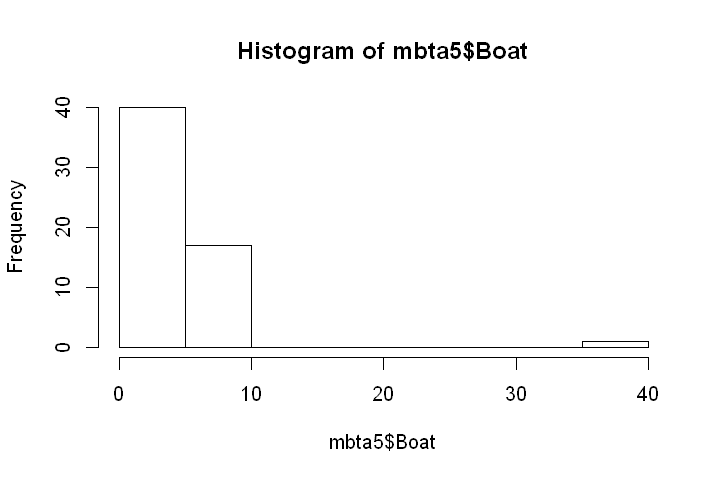

In [57]:
# View a summary of mbta6
summary(mbta5)

# Generate a histogram of Boat column
hist(mbta5$Boat)

we assume that it is an entry error and that it meant to ne 4 instead of 40.

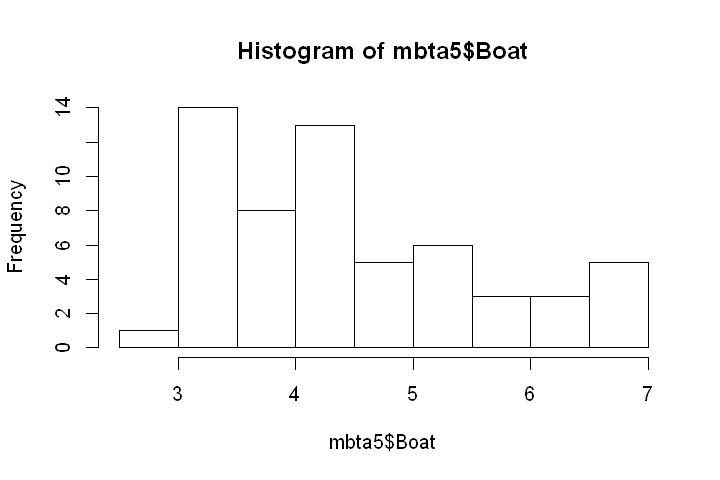

In [58]:
# Find the row number of the incorrect value: i
i <- which(mbta5$Boat >= 40)

# Replace the incorrect value with 4
mbta5$Boat[i] <- 4

# Generate a histogram of Boat column
hist(mbta5$Boat)

In [59]:
names(mbta5)
mbta_long <- gather(mbta5, key = "mode", value = "thou_riders", -year, -month)
names(mbta_long)

[1] "year"              "month"             "Boat"             
 [4] "Bus"               "Commuter Rail"     "Heavy Rail"       
 [7] "Light Rail"        "Private Bus"       "RIDE"             
[10] "Trackless Trolley"

[1] "year"        "month"       "mode"        "thou_riders"

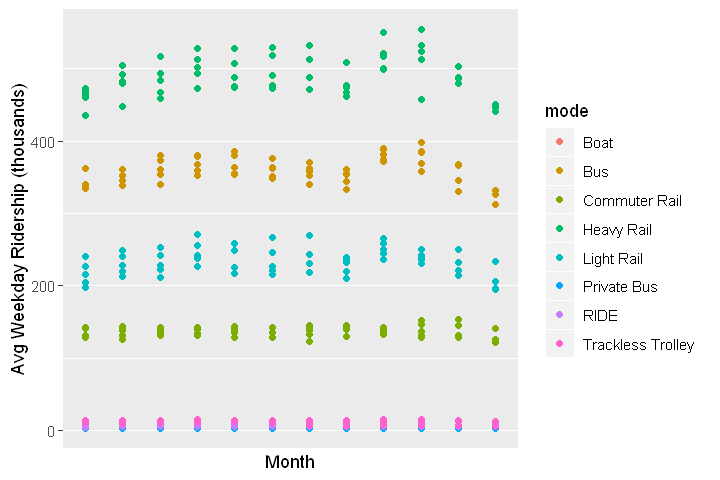

In [60]:
# Look at all T ridership over time (don't change)
ggplot(mbta_long, aes(x = month, y = thou_riders, col = mode)) + 
    geom_point() + 
    scale_x_discrete(name = "Month", breaks = c(200701, 200801, 200901, 201001, 201101)) +  
    scale_y_continuous(name = "Avg Weekday Ridership (thousands)")

In [61]:
mbta_boat <- mbta_long %>%
                filter(mode == "Boat" | mode == "Trackless Trolley")

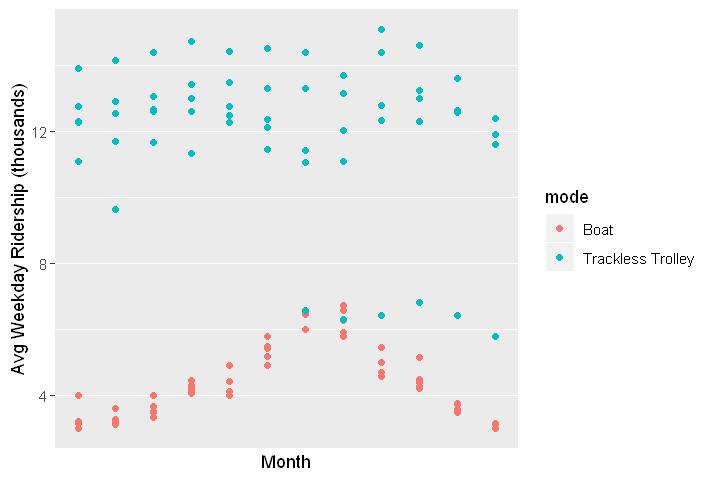

In [62]:
# Look at Boat and Trackless Trolley ridership over time (don't change)
ggplot(mbta_boat, aes(x = month, y = thou_riders, col = mode)) +  
    geom_point() + 
    scale_x_discrete(name = "Month", breaks = c(200701, 200801, 200901, 201001, 201101)) + 
    scale_y_continuous(name = "Avg Weekday Ridership (thousands)")

# Case study - nutrition analysis
### Importing the data

As a person of many talents, it's time to take on a different job: nutrition analysis! Your goal is to analyze the sugar content of a sample of foods from around the world.

A large dataset called food.csv is ready for your use in the working directory. Instead of the usual read.csv(), however, you're going to use the faster `fread()` from the data.table package. By default, the data will come in as a data table, but since you're used to working with data frames, you can get `fread()` to return one by setting data.table = FALSE.

[Note: In order to make these exercises manageable, we've taken a random subset of the original data. The dataset you'll be working with may not be large enough for fread() to make a huge difference, but be aware that there will be times when read.csv() just won't cut it.]

In [3]:
# Load data.table
library(data.table)

# Import food.csv as a data frame: df_food
food <- fread("food.csv", data.table = F)

### Examining the data

As usual, you'll need to get an idea of what the dataset looks like in order to know how to proceed.

In [5]:
# View summary of food
summary(food)

       V1              code            url              creator         
 Min.   :   1.0   Min.   :100030   Length:1500        Length:1500       
 1st Qu.: 375.8   1st Qu.:124975   Class :character   Class :character  
 Median : 750.5   Median :149514   Mode  :character   Mode  :character  
 Mean   : 750.5   Mean   :149613                                        
 3rd Qu.:1125.2   3rd Qu.:174506                                        
 Max.   :1500.0   Max.   :199880                                        
                                                                        
   created_t         created_datetime   last_modified_t    
 Min.   :1.332e+09   Length:1500        Min.   :1.340e+09  
 1st Qu.:1.394e+09   Class :character   1st Qu.:1.424e+09  
 Median :1.425e+09   Mode  :character   Median :1.437e+09  
 Mean   :1.414e+09                      Mean   :1.430e+09  
 3rd Qu.:1.436e+09                      3rd Qu.:1.446e+09  
 Max.   :1.453e+09                      Max.   :1.453e+0

In [7]:
# View head of food
head(food, 3)

V1,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,...,caffeine_100g,taurine_100g,ph_100g,fruits_vegetables_nuts_100g,collagen_meat_protein_ratio_100g,cocoa_100g,chlorophyl_100g,carbon_footprint_100g,nutrition_score_fr_100g,nutrition_score_uk_100g
1,100030,http://world-en.openfoodfacts.org/product/3222475745867/confiture-de-fraise-fraise-des-bois-au-sucre-de-canne-casino-delices,sebleouf,1424747544,2015-02-24T03:12:24Z,1438445887,2015-08-01T16:18:07Z,Confiture de fraise fraise des bois au sucre de canne,,...,NA,NA,NA,54,NA,NA,NA,NA,11,11
2,100050,http://world-en.openfoodfacts.org/product/5410976880110/guylian-sea-shells-selection,foodorigins,1450316429,2015-12-17T01:40:29Z,1450817956,2015-12-22T20:59:16Z,Guylian Sea Shells Selection,,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,100079,http://world-en.openfoodfacts.org/product/3264750423503/pates-de-fruits-aromatisees-jacquot,domdom26,1428674916,2015-04-10T14:08:36Z,1428739289,2015-04-11T08:01:29Z,PÃ¢tes de fruits aromatisÃ©es,PÃ¢tes de fruits,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [9]:
glimpse(food)

Observations: 1,500
Variables: 160
$ V1                                         <int> 1, 2, 3, 4, 5, 6, 7, 8, ...
$ code                                       <int> 100030, 100050, 100079, ...
$ url                                        <chr> "http://world-en.openfoo...
$ creator                                    <chr> "sebleouf", "foodorigins...
$ created_t                                  <int> 1424747544, 1450316429, ...
$ created_datetime                           <chr> "2015-02-24T03:12:24Z", ...
$ last_modified_t                            <int> 1438445887, 1450817956, ...
$ last_modified_datetime                     <chr> "2015-08-01T16:18:07Z", ...
$ product_name                               <chr> "Confiture de fraise fra...
$ generic_name                               <chr> "", "", "PÃ¢tes de fruit...
$ quantity                                   <chr> "265 g", "375g", "1 kg",...
$ packaging                                  <chr> "Bocal,Verre", "Plastic,...
$ packaging_tags 

### Inspecting variables

The `str()`, `head()`, and `summary()` functions are designed to give you some information about a dataset without being overwhelming. However, this dataset is so large and has so many variables that even these outputs seemed pretty intimidating!

The `glimpse()` function from the dplyr package often formats information in a more approachable way.

Yet another option is to just look at the column names to see what kinds of data you have. As you look at the names, pay particular attention to any pairs that look like duplicates.

In [10]:
names(food)

[1] "V1"                                        
  [2] "code"                                      
  [3] "url"                                       
  [4] "creator"                                   
  [5] "created_t"                                 
  [6] "created_datetime"                          
  [7] "last_modified_t"                           
  [8] "last_modified_datetime"                    
  [9] "product_name"                              
 [10] "generic_name"                              
 [11] "quantity"                                  
 [12] "packaging"                                 
 [13] "packaging_tags"                            
 [14] "brands"                                    
 [15] "brands_tags"                               
 [16] "categories"                                
 [17] "categories_tags"                           
 [18] "categories_en"                             
 [19] "origins"                                   
 [20] "origins_tags"                              
 [21] "manufacturing_places"                      
 [22] "manufacturing_places_tags"                 
 [23] "labels"                                    
 [24] "labels_tags"                               
 [25] "labels_en"                                 
 [26] "emb_codes"                                 
 [27] "emb_codes_tags"                            
 [28] "first_packaging_code_geo"                  
 [29] "cities"                                    
 [30] "cities_tags"                               
 [31] "purchase_places"                           
 [32] "stores"                                    
 [33] "countries"                                 
 [34] "countries_tags"                            
 [35] "countries_en"                              
 [36] "ingredients_text"                          
 [37] "allergens"                                 
 [38] "allergens_en"                              
 [39] "traces"                                    
 [40] "traces_tags"                               
 [41] "traces_en"                                 
 [42] "serving_size"                              
 [43] "no_nutriments"                             
 [44] "additives_n"                               
 [45] "additives"                                 
 [46] "additives_tags"                            
 [47] "additives_en"                              
 [48] "ingredients_from_palm_oil_n"               
 [49] "ingredients_from_palm_oil"                 
 [50] "ingredients_from_palm_oil_tags"            
 [51] "ingredients_that_may_be_from_palm_oil_n"   
 [52] "ingredients_that_may_be_from_palm_oil"     
 [53] "ingredients_that_may_be_from_palm_oil_tags"
 [54] "nutrition_grade_uk"                        
 [55] "nutrition_grade_fr"                        
 [56] "pnns_groups_1"                             
 [57] "pnns_groups_2"                             
 [58] "states"                                    
 [59] "states_tags"                               
 [60] "states_en"                                 
 [61] "main_category"                             
 [62] "main_category_en"                          
 [63] "image_url"                                 
 [64] "image_small_url"                           
 [65] "energy_100g"                               
 [66] "energy_from_fat_100g"                      
 [67] "fat_100g"                                  
 [68] "saturated_fat_100g"                        
 [69] "butyric_acid_100g"                         
 [70] "caproic_acid_100g"                         
 [71] "caprylic_acid_100g"                        
 [72] "capric_acid_100g"                          
 [73] "lauric_acid_100g"                          
 [74] "myristic_acid_100g"                        
 [75] "palmitic_acid_100g"                        
 [76] "stearic_acid_100g"                         
 [77] "arachidic_acid_100g"                       
 [78] "behenic_acid_100g"                         
 [79] "lignoceric_acid_1

### Removing duplicate info

Wow! That's a lot of variables. To summarize, there's some information on what and when information was added (1:9), meta information about food (10:17, 22:27), where it came from (18:21, 28:34), what it's made of (35:52), nutrition grades (53:54), some unclear (55:63), and some nutritional information (64:159).

There are also many different pairs of columns that contain duplicate information. Luckily, you have a trusty assistant who went through and identified duplicate columns for you.

A vector has been created for you that lists out all of the duplicates; all you need to do is remove those columns from the dataset. Don't forget, you can use the - operator to specify columns to omit, e.g.:

`my_df[, -3] # Omit third column`


In [11]:
# Define vector of duplicate cols (don't change)
duplicates <- c(4, 6, 11, 13, 15, 17, 18, 20, 22, 
                24, 25, 28, 32, 34, 36, 38, 40, 
                44, 46, 48, 51, 54, 65, 158)

# Remove duplicates from food: food2
food2 <- food[,-duplicates]

### Removing useless info

Your dataset is much more manageable already.

In addition to duplicate columns, there are many columns containing information that you just can't use. For example, the first few columns contain internal codes that don't have any meaning to us. There are also some column names that aren't clear enough to tell what they contain.

All of these columns can be deleted. Once again, your assistant did a splendid job finding the indices for you.

In [14]:
# Define useless vector (don't change)
useless <- c(1, 2, 3, 32:41)

# Remove useless columns from food2: food3
food3 <- food2[, -useless]
head(food3, 2)

created_t,last_modified_t,last_modified_datetime,product_name,generic_name,packaging,brands,categories,origins,manufacturing_places,...,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits_vegetables_nuts_100g,collagen_meat_protein_ratio_100g,cocoa_100g,chlorophyl_100g,nutrition_score_fr_100g,nutrition_score_uk_100g
1424747544,1438445887,2015-08-01T16:18:07Z,Confiture de fraise fraise des bois au sucre de canne,,"Bocal,Verre",Casino DÃ©lices,"Aliments et boissons Ã base de vÃ©gÃ©taux,Aliments d'origine vÃ©gÃ©tale,Aliments Ã base de fruits et de lÃ©gumes,Petit-dÃ©jeuners,Produits Ã tartiner,Fruits et produits dÃ©rivÃ©s,PÃ¢tes Ã tartiner vÃ©gÃ©taux,Produits Ã tartiner sucrÃ©s,Confitures et marmelades,Confitures,Confitures de fruits,Confitures de fruits rouges,Confitures de fraises",,France,...,NA,NA,NA,NA,54,NA,NA,NA,11,11
1450316429,1450817956,2015-12-22T20:59:16Z,Guylian Sea Shells Selection,,"Plastic,Box",Guylian,Chocolate,,Belgium,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


### Finding columns

Looking much nicer! Recall from the first exercise that you are assuming you will be analyzing the sugar content of these foods. Therefore, your next step is to look at a summary of the nutrition information.

All of the columns with nutrition info contain the character string "100g" as part of their name, which makes it easy to identify them.

In [16]:
library(stringr)
# Create vector of column indices: nutrition
nutrition <- str_detect(names(food3), "100g")

# View a summary of nutrition columns
summary(food3[,nutrition])

 energy_from_fat_100g    fat_100g      saturated_fat_100g butyric_acid_100g
 Min.   :   0.00      Min.   :  0.00   Min.   : 0.000     Mode:logical     
 1st Qu.:  35.98      1st Qu.:  0.90   1st Qu.: 0.200     NA's:1500        
 Median : 237.00      Median :  6.00   Median : 1.700                      
 Mean   : 668.41      Mean   : 13.39   Mean   : 4.874                      
 3rd Qu.: 974.00      3rd Qu.: 20.00   3rd Qu.: 6.500                      
 Max.   :2900.00      Max.   :100.00   Max.   :57.000                      
 NA's   :1486         NA's   :708      NA's   :797                         
 caproic_acid_100g caprylic_acid_100g capric_acid_100g lauric_acid_100g
 Mode:logical      Mode:logical       Mode:logical     Mode:logical    
 NA's:1500         NA's:1500          NA's:1500        NA's:1500       
                                                                       
                                                                       
                                

### Replacing missing values

Unfortunately, the summary revealed that the nutrition data are mostly NA values. After consulting with the lab technician, it appears that much of the data is missing because the food just doesn't have those nutrients.

But all is not lost! The lab tech also said that for sugar content, zero values are sometimes entered explicitly, but sometimes the values are just left empty to denote a zero. A statistical miracle!

In this exercise, you'll replace all NA values with zeroes in the sugars_100g column and make histograms to visualize the result. Then, you will exclude the observations which have no sugar to see how the distribution changes.

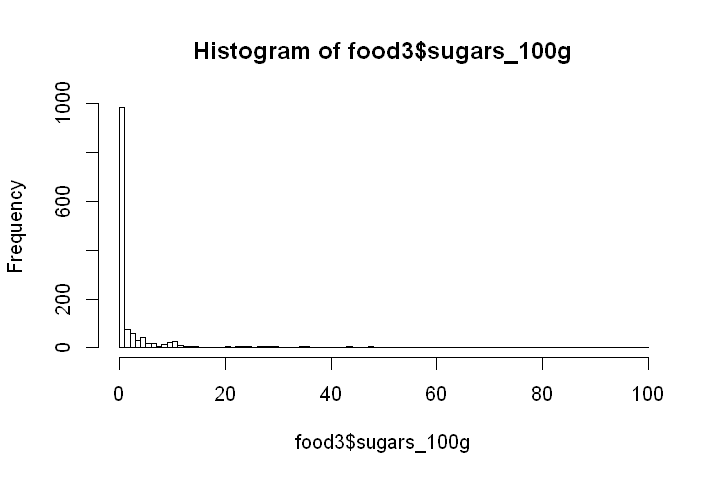

In [17]:
# Find indices of sugar NA values: missing
missing <- is.na(food3$sugars_100g)

# Replace NA values with 0
food3$sugars_100g[missing] <- 0

# Create first histogram
hist(food3$sugars_100g, breaks = 100)

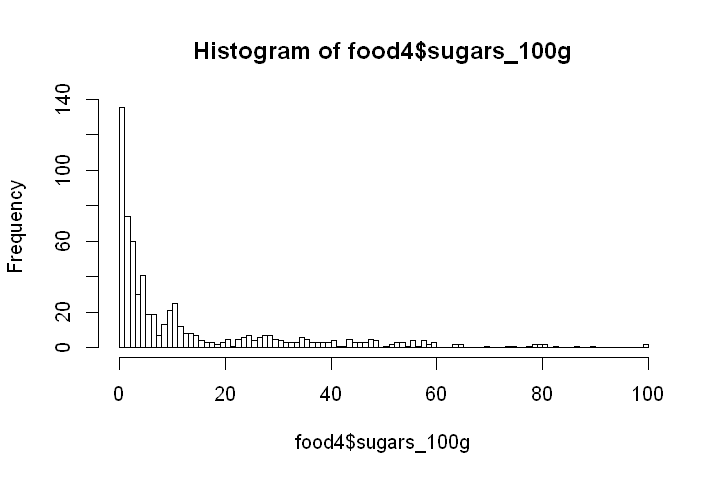

In [18]:
# Create food4
food4 <- food3[food3$sugars_100g > 0,]

# Create second histogram
hist(food4$sugars_100g, breaks = 100)

### Dealing with messy data

Your analysis of sugar content was so impressive that you've now been tasked with determining how many of these foods come in some sort of plastic packaging. (No good deed goes unpunished, as they say.)

Your dataset has information about packaging, but there's a bit of a problem: it's stored in several different languages (Spanish, French, and English). This takes messy data to a whole new level! There is no R package to selectively translate, but what if you could just work with the messy data directly?

You're in luck! The root word for plastic is same in English (plastic), French (plastique), and Spanish (plastico). To get a general idea of how many of these foods are packaged in plastic, you can look through the packaging column for the string "plasti".

In [20]:
# Find entries containing "plasti": plastic
plastic <- str_detect(food3$packaging, "plasti")

# Print the sum of plastic
sum(plastic)

[1] 232

# Case study - Attendance analysis
### Importing the data

In this chapter, you'll work with attendance data from public schools in the US, organized by school level and state, during the 2007-2008 academic year. The data contain information on average daily attendance (ADA) as a percentage of total enrollment, school day length, and school year length.

The data were given to you in an Excel spreadsheet, which you can download or view a screenshot of. Either way, take a moment to look at the spreadsheet.

Do you see any symptoms of untidy data? At first glance, it looks like the first row is a description of the data, the second row is a variable itself that groups multiple columns together, and the fourth row gives numbers for the columns, which might look nice in a spreadsheet but isn't very useful for you, the analyst.

You'll take it one step at a time to import the data using the gdata package. The name of this spreadsheet is "attendance.xls" and is available in your working directory.

In [25]:
# Load the gdata package
library(gdata)

# Import the spreadsheet: att
att <- read.xls("attendance.xls", perl = "C:\\Perl64\\bin\\perl.exe")

### Examining the data

For your reference, here is an image of the spreadsheet you are responsible for. Now that you've successfully imported the data into R, you can get a better idea of how the spreadsheet was read in.

In [26]:
# Print the column names 
names(att)

# Print the first 6 rows
head(att)

# Print the last 6 rows
tail(att)

[1] "Table.43..Average.daily.attendance..ADA..as.a.percentage.of.total.enrollment..school.day.length..and.school.year.length.in.public.schools..by.school.level.and.state..2007.08"
 [2] "X"                                                                                                                                                                            
 [3] "X.1"                                                                                                                                                                          
 [4] "X.2"                                                                                                                                                                          
 [5] "X.3"                                                                                                                                                                          
 [6] "X.4"                                                                                                                                                                          
 [7] "X.5"                                                                                                                                                                          
 [8] "X.6"                                                                                                                                                                          
 [9] "X.7"                                                                                                                                                                          
[10] "X.8"                                                                                                                                                                          
[11] "X.9"                                                                                                                                                                          
[12] "X.10"                                                                                                                                                                         
[13] "X.11"                                                                                                                                                                         
[14] "X.12"                                                                                                                                                                         
[15] "X.13"                                                                                                                                                                         
[16] "X.14"                                                                                                                                                                         
[17] "X.15"

Table.43..Average.daily.attendance..ADA..as.a.percentage.of.total.enrollment..school.day.length..and.school.year.length.in.public.schools..by.school.level.and.state..2007.08,X,X.1,X.2,X.3,X.4,X.5,X.6,X.7,X.8,X.9,X.10,X.11,X.12,X.13,X.14,X.15
,"Total elementary, secondary, and combined elementary/secondary schools",,,,,,,,Elementary schools,,,,Secondary schools,,,
,ADA as percent of enrollment,,Average hours in school day,,Average days in school year,,Average hours in school year,,ADA as percent of enrollment,,Average hours in school day,,ADA as percent of enrollment,,Average hours in school day,
1,2,,3,,4,,5,,6,,7,,8,,9,
United States ........,93.1,(0.22),6.6,(0.02),180,(0.1),"1,193",(3.1),94.0,(0.27),6.7,(0.02),91.1,(0.43),6.6,(0.04)
Alabama .................,93.8,(1.24),7.0,(0.07),180,(0.8),"1,267",(12.3),93.8,(1.84),7.0,(0.08),94.6,(0.38),7.1,(0.17)
Alaska ..................,89.9,(1.22),6.5,(0.05),180,(3.4),"1,163",(22.9),91.3,(1.56),6.5,(0.05),93.2,(1.57),6.2,(0.15)


,Table.43..Average.daily.attendance..ADA..as.a.percentage.of.total.enrollment..school.day.length..and.school.year.length.in.public.schools..by.school.level.and.state..2007.08,X,X.1,X.2,X.3,X.4,X.5,X.6,X.7,X.8,X.9,X.10,X.11,X.12,X.13,X.14,X.15
54,Wisconsin ...............,95.0,(0.57),6.9,(0.04),180,(0.7),"1,246",(8.6),95.4,(0.41),6.9,(0.05),93.0,(1.91),7.0,(0.14)
55,Wyoming .................,92.4,(1.15),6.9,(0.05),175,(1.3),"1,201",(8.3),92.2,(1.65),6.9,(0.05),92.4,(0.75),7.0,(0.07)
56,â€ Not applicable.,,,,,,,,,,,,,,,,
57,â€¡Reporting standards not met (too few cases).,,,,,,,,,,,,,,,,
58,"NOTE: Averages reflect data reported by schools rather than state requirements. School-reported length of day may exceed state requirements, and there is a range of statistical error in reported estimates. Standard errors appear in parentheses.",,,,,,,,,,,,,,,,
59,"SOURCE: U.S. Department of Education, National Center for Education Statistics, Schools and Staffing Survey (SASS), \Public School Questionnaire",\ 2003-04 and 2007-08. (This table was prepared June 2011.),,,,,,,,,,,,,,,


In [27]:
# Print the structure
glimpse(att)

Observations: 59
Variables: 17
$ Table.43..Average.daily.attendance..ADA..as.a.percentage.of.total.enrollment..school.day.length..and.school.year.length.in.public.schools..by.school.level.and.state..2007.08 <fct> ...
$ X                                                                                                                                                                             <fct> ...
$ X.1                                                                                                                                                                           <fct> ...
$ X.2                                                                                                                                                                           <fct> ...
$ X.3                                                                                                                                                                           <fct> ...
$ X.4                                  

### Removing unnecessary rows

Again, for reference, here is an image of the first 22 rows of the original spreadsheet you were given. Looking at this image, you can see that rows 1, 4, 11, and 17 of the spreadsheet are useless. But is it safe to do something like the following?
![attendance_screenshot](attendance_screenshot.png)

`att2 <- att[-c(1, 4, 11, 17), ]`

No! From the last exercise, you might have realized that the read.xls() function actually imported the first row of the original data frame as the variable name for the first column. Did you notice that the first 6 rows of att aren't the same as the first six rows you saw in the original spreadsheet? What about the 11th and 17th rows?

When you're importing a messy spreadsheet into R, it's good practice to compare the original spreadsheet with what you've imported. It turns out that, by default, the read.xls() function skips empty rows such as the 11th and 17th.

After viewing your data frame, you realize you still need to get rid of the third row of att, as well as rows 56 through 59.

In [28]:
# Create remove
remove <- c(3, 56:59)

# Create att2
att2 <- att[-remove,]
head(att2)

,Table.43..Average.daily.attendance..ADA..as.a.percentage.of.total.enrollment..school.day.length..and.school.year.length.in.public.schools..by.school.level.and.state..2007.08,X,X.1,X.2,X.3,X.4,X.5,X.6,X.7,X.8,X.9,X.10,X.11,X.12,X.13,X.14,X.15
1,,"Total elementary, secondary, and combined elementary/secondary schools",,,,,,,,Elementary schools,,,,Secondary schools,,,
2,,ADA as percent of enrollment,,Average hours in school day,,Average days in school year,,Average hours in school year,,ADA as percent of enrollment,,Average hours in school day,,ADA as percent of enrollment,,Average hours in school day,
4,United States ........,93.1,(0.22),6.6,(0.02),180,(0.1),"1,193",(3.1),94.0,(0.27),6.7,(0.02),91.1,(0.43),6.6,(0.04)
5,Alabama .................,93.8,(1.24),7.0,(0.07),180,(0.8),"1,267",(12.3),93.8,(1.84),7.0,(0.08),94.6,(0.38),7.1,(0.17)
6,Alaska ..................,89.9,(1.22),6.5,(0.05),180,(3.4),"1,163",(22.9),91.3,(1.56),6.5,(0.05),93.2,(1.57),6.2,(0.15)
7,Arizona .................,89.0,(2.95),6.4,(0.09),181,(1.7),"1,159",(14.4),88.9,(3.91),6.4,(0.10),89.0,(3.22),6.4,(0.25)


### Removing useless columns

Once more, for reference, here is an image of the first 22 rows of the original spreadsheet. You can see here that the columns 3, 5, 7, 9, 11, 13, 15, and 17 (or columns C, E, G, I, K, M, O, Q in Excel) don't contain the values of average daily attendance (ADA). You'll get rid of them in this exercise.

In [30]:
# Create remove
remove <- c( 3, 5, 7, 9, 11, 13, 15, 17)

# Create att3
att3 <- att2[,-remove]
head(att3,3)

,Table.43..Average.daily.attendance..ADA..as.a.percentage.of.total.enrollment..school.day.length..and.school.year.length.in.public.schools..by.school.level.and.state..2007.08,X,X.2,X.4,X.6,X.8,X.10,X.12,X.14
1,,"Total elementary, secondary, and combined elementary/secondary schools",,,,Elementary schools,,Secondary schools,
2,,ADA as percent of enrollment,Average hours in school day,Average days in school year,Average hours in school year,ADA as percent of enrollment,Average hours in school day,ADA as percent of enrollment,Average hours in school day
4,United States ........,93.1,6.6,180,"1,193",94.0,6.7,91.1,6.6


### Splitting the data

In many cases, a single data frame stores multiple "tables" of information. You can often diagnose this problem by looking at the column names and noticing duplicate rows.

In this data frame, columns 1, 6, and 7 represent attendance data for US elementary schools, columns 1, 8, and 9 represent data for secondary schools, and columns 1 through 5 represent data for all schools in the US.

Each of these should be stored as its own separate data frame, so you'll split them up here.

In [31]:
# Subset just elementary schools: att_elem
att_elem <- select(att3, 1, 6, 7)

# Subset just secondary schools: att_sec
att_sec <- select(att3, 1, 8, 9)

# Subset all schools: att4
att4 <- select(att3, 1:5)

### Replacing the names

Since you went through so much trouble finding out which row stored the variable names, you should store that row as the actual column names of the data frame. We've modified the names a bit in order to be more stylistically sound; they're stored as cnames in the editor.

This will also allow you to remove the first two rows (currently storing variable names).

In [32]:
## att4 is pre-loaded

# Define cnames vector (don't change)
cnames <- c("state", "avg_attend_pct", "avg_hr_per_day", 
            "avg_day_per_yr", "avg_hr_per_yr")

# Assign column names of att4
colnames(att4) <- cnames

# Remove first two rows of att4: att5
att5 <- att4[-c(1,2),]

# View the names of att5
names(att5)

[1] "state"          "avg_attend_pct" "avg_hr_per_day" "avg_day_per_yr"
[5] "avg_hr_per_yr"

In [34]:
head(att5)

,state,avg_attend_pct,avg_hr_per_day,avg_day_per_yr,avg_hr_per_yr
4,United States ........,93.1,6.6,180,"1,193"
5,Alabama .................,93.8,7.0,180,"1,267"
6,Alaska ..................,89.9,6.5,180,"1,163"
7,Arizona .................,89.0,6.4,181,"1,159"
8,Arkansas ................,91.8,6.9,179,"1,229"
9,California ..............,93.2,6.2,181,"1,129"


### Cleaning up extra characters

One of the most irritating things about this dataset is that the state names are all stored as the same number of characters, with periods padding the ends of the shorter states. That may be helpful for reading the spreadsheet, but it makes your life harder, so you'll deal with it in this exercise.

One pitfall to avoid: . is a special character in the language of regular expressions (a.k.a. regex). In order to specify that you actually want to remove periods and not their regex equivalent (which is "all characters"), use \\.. This is called an "escape" sequence.

In [36]:
# Remove all periods in state column
att5$state <- str_replace_all(att5$state, "\\.", "")

# Remove white space around state names
att5$state <- str_trim(att5$state, side = "both")

# View the head of att5
head(att5)

,state,avg_attend_pct,avg_hr_per_day,avg_day_per_yr,avg_hr_per_yr
4,United States,93.1,6.6,180,"1,193"
5,Alabama,93.8,7.0,180,"1,267"
6,Alaska,89.9,6.5,180,"1,163"
7,Arizona,89.0,6.4,181,"1,159"
8,Arkansas,91.8,6.9,179,"1,229"
9,California,93.2,6.2,181,"1,129"


### Some final type conversions

Finally, you'll convert the values in certain variables to numerics (instead of factors). It's worth noting that in previous chapters, your numerical data has often come in as character strings. This is just a difference between `read.xls()` and the other import functions you've used.

The dplyr package offers an efficient method for applying a function to many columns at once. If you'd like to learn more, check out DataCamp's course on Data Manipulation in R with dplyr! Since you might not have taken the dplyr course yet, we're just showing you the code here. You'll do the same thing, but using subsetting and `sapply()` instead.

In [38]:
# Change columns
att6 <- mutate_at(att5, vars(-state), funs(as.numeric))

# Same thing wihtout using dplyr 
# Define vector containing numerical columns: cols
cols <- -1

# Use sapply to coerce cols to numeric
att5[, cols] <- sapply(att5[, cols], as.numeric)

In [41]:
head(att6)

state,avg_attend_pct,avg_hr_per_day,avg_day_per_yr,avg_hr_per_yr
United States,22,7,10,26
Alabama,28,11,10,45
Alaska,8,6,10,15
Arizona,6,5,11,13
Arkansas,14,10,9,36
California,23,3,11,5
